In [1]:
import pandas as pd

# 文件路径
data_path = r"D:\DATA\bike.csv"  # 使用原始字符串（raw string）避免转义问题

try:
    # 读取 CSV 文件
    df = pd.read_csv(data_path)

    # 删除 'id' 列
    df = df.drop(columns=['id'])

    # 打印数据（不显示行索引）
    print(df.to_string(index=False))

except FileNotFoundError:
    print(f"文件未找到: {data_path}")
except Exception as e:
    print(f"读取文件时出错: {e}")

 city  hour  is_workday  weather  temp_air  temp_body  wind   y
    0    22           1        2       3.0        0.7     0  15
    0    10           1        1      21.0       24.9     3  48
    0     0           1        1      25.3       27.4     0  21
    0     7           0        1      15.7       16.2     0  11
    1    10           1        1      21.1       25.0     2  39
    1     0           1        1      20.4       18.2     0  12
    0     0           1        1      13.0       13.3     2  11
    0    15           1        1      29.5       30.9     2  67
    0    15           1        2      10.4       10.6     3  77
    1     4           1        3      17.4       18.0     3   2
    1     0           1        1      14.9       15.3     2   6
    1     8           0        1      25.0       28.1     0  25
    0    21           0        2       8.7        8.8     0  52
    0     5           1        3      14.5       14.9     1   8
    1     3           1        1      25

In [2]:
shanghai_data = df[df['city'] == 1]
shanghai_data = shanghai_data.drop(columns=['city'])
print(shanghai_data.to_string(index=False))

 hour  is_workday  weather  temp_air  temp_body  wind   y
   10           1        1      21.1       25.0     2  39
    0           1        1      20.4       18.2     0  12
    4           1        3      17.4       18.0     3   2
    0           1        1      14.9       15.3     2   6
    8           0        1      25.0       28.1     0  25
    3           1        1      25.4       28.6     1   0
   14           0        1       7.0        5.0     1  49
   17           1        1       7.5        3.5     2  75
    1           1        1      18.0       18.7     3   5
    7           0        2      22.8       24.8     1  13
    0           1        1      20.9       19.8     1  11
   22           1        1      28.1       32.4     2  42
   14           1        2      22.3       24.2     3  51
   21           0        1      26.4       28.6     2  62
   16           1        1      11.3       11.5     1  60
   20           1        1       1.7       -0.7     0  32
    1         

In [3]:
shanghai_data['hour'] = shanghai_data['hour'].apply(lambda x:1 if 6 <= x < 19 else 0)
print(shanghai_data.to_string(index=False))

 hour  is_workday  weather  temp_air  temp_body  wind   y
    1           1        1      21.1       25.0     2  39
    0           1        1      20.4       18.2     0  12
    0           1        3      17.4       18.0     3   2
    0           1        1      14.9       15.3     2   6
    1           0        1      25.0       28.1     0  25
    0           1        1      25.4       28.6     1   0
    1           0        1       7.0        5.0     1  49
    1           1        1       7.5        3.5     2  75
    0           1        1      18.0       18.7     3   5
    1           0        2      22.8       24.8     1  13
    0           1        1      20.9       19.8     1  11
    0           1        1      28.1       32.4     2  42
    1           1        2      22.3       24.2     3  51
    0           0        1      26.4       28.6     2  62
    1           1        1      11.3       11.5     1  60
    0           1        1       1.7       -0.7     0  32
    0         

In [4]:
y = shanghai_data['y'].values
shanghai_data = shanghai_data.drop(columns = ['y'])
print(y)

[39 12  2 ...  1  1 11]


In [5]:
data_array = shanghai_data.values
print(data_array)

[[ 1.   1.   1.  21.1 25.   2. ]
 [ 0.   1.   1.  20.4 18.2  0. ]
 [ 0.   1.   3.  17.4 18.   3. ]
 ...
 [ 0.   1.   3.  13.7 14.1  2. ]
 [ 0.   0.   1.  22.3 22.2  0. ]
 [ 0.   0.   1.   9.6  9.7  0. ]]


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(shanghai_data, y, test_size=0.2, random_state=42)

print("训练集特征：", X_train.shape)
print("测试集特征：", X_test.shape)
print("训练集标签：", y_train.shape)
print("测试集标签：", y_test.shape)

训练集特征： (3998, 6)
测试集特征： (1000, 6)
训练集标签： (3998,)
测试集标签： (1000,)


In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = y_scaler.transform(y_test.reshape(-1, 1))

print("归一化后的训练集特征：", X_train_scaled)
print("归一化后的测试集特征：", X_test_scaled)

归一化后的训练集特征： [[1.         1.         0.         0.66063348 0.65224359 0.42857143]
 [1.         1.         0.         0.18778281 0.21634615 0.14285714]
 [1.         1.         0.         0.760181   0.71153846 0.14285714]
 ...
 [1.         0.         0.         0.739819   0.69711538 0.14285714]
 [1.         1.         0.         0.6040724  0.57852564 0.        ]
 [1.         0.         0.         0.19909502 0.2099359  0.28571429]]
归一化后的测试集特征： [[0.         0.         0.         0.26244344 0.32051282 0.        ]
 [0.         1.         0.5        0.1561086  0.19230769 0.14285714]
 [1.         1.         0.         0.77828054 0.7099359  0.57142857]
 ...
 [1.         1.         0.         0.73076923 0.67467949 0.        ]
 [1.         1.         0.         0.83484163 0.78365385 0.28571429]
 [1.         0.         0.         0.94343891 0.8974359  0.28571429]]


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"训练集均方误差 (MSE): {train_mse}")
print(f"测试集均方误差 (MSE): {test_mse}")
print(f"训练集 R²: {train_r2}")
print(f"测试集 R²: {test_r2}")

训练集均方误差 (MSE): 994.7847090288709
测试集均方误差 (MSE): 996.5688433356046
训练集 R²: 0.38196003909473386
测试集 R²: 0.3718395317360643


In [9]:
import numpy as np
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f"测试集的均方根误差 (RMSE): {rmse}")

测试集的均方根误差 (RMSE): 31.568478635113294


In [10]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np

iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"训练集特征的形状: {X_train.shape}")
print(f"测试集特征的形状: {X_test.shape}")
print(f"训练集标签的形状: {y_train.shape}")
print(f"测试集标签的形状: {y_test.shape}")

训练集特征的形状: (120, 4)
测试集特征的形状: (30, 4)
训练集标签的形状: (120,)
测试集标签的形状: (30,)


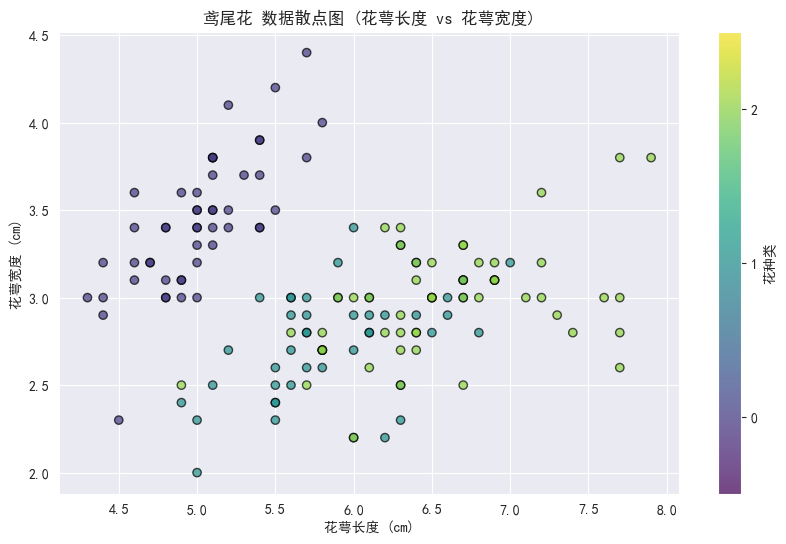

In [11]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']

sepal_length = X[:, 0]
sepal_width = X[:, 1]

plt.figure(figsize=(10, 6))
scatter = plt.scatter(sepal_length, sepal_width, c=y, cmap='viridis', edgecolor='k', alpha=0.7)
plt.colorbar(scatter, ticks=[0, 1, 2], label='花种类')
plt.clim(-0.5, 2.5)

plt.xlabel('花萼长度 (cm)')
plt.ylabel('花萼宽度 (cm)')
plt.title('鸢尾花 数据散点图 (花萼长度 vs 花萼宽度)')

plt.show()

D:\sthinpython\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)


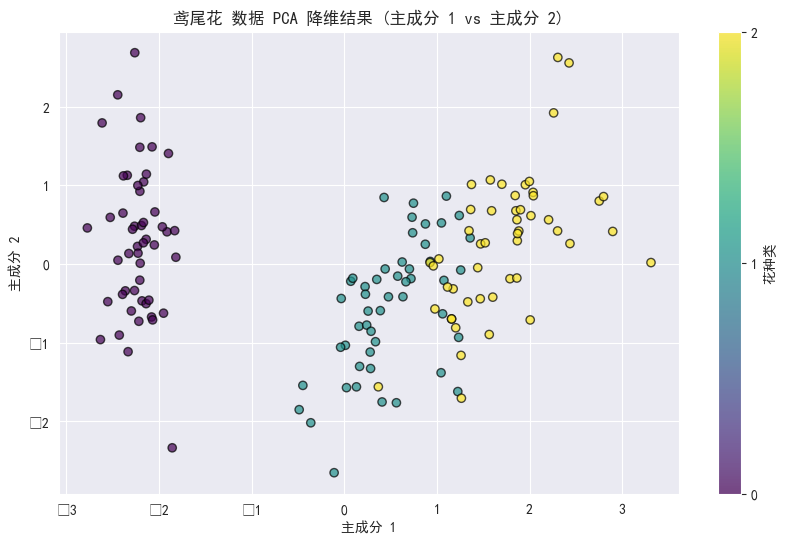

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', alpha=0.7)
plt.colorbar(scatter, ticks=[0, 1, 2], label='花种类')

plt.xlabel('主成分 1')
plt.ylabel('主成分 2')
plt.title('鸢尾花 数据 PCA 降维结果 (主成分 1 vs 主成分 2)')

plt.show()

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

print("混淆矩阵:")
print(confusion_matrix(y_test, y_pred))
print("\n分类报告:")
print(classification_report(y_test, y_pred))

混淆矩阵:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

分类报告:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"分类准确率: {accuracy:.2f}")


分类准确率: 1.00
